# Implementação de multi-layer perceptron

# Importações

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from random import randint

# MNIST

## Carregando o dataset

In [12]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# MNIST c/ Conv. Net

## Configurando a rede neural

In [13]:
# Feature Learning Section
model_conv = tf.keras.models.Sequential()  # a basic feed-forward model
model_conv.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_conv.add(tf.keras.layers.MaxPooling2D((2, 2))) # Pooling para reduzir a dimensionalidade de sem perder o perfil característico, as features, das images
model_conv.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(tf.keras.layers.MaxPooling2D((2, 2))) 

![FeatureLearning](../images/featureLearning.jpeg)


In [14]:
# Class Identification Section
model_conv.add(tf.keras.layers.Flatten())
model_conv.add(tf.keras.layers.Dense(128, activation="relu"))  # a simple fully-connected layer, 128 units, relu activation
model_conv.add(tf.keras.layers.Dense(10))  # a simple fully-connected layer, 128 units, relu activation

![Classification](../images/classIdentification.jpeg)


In [15]:
model_conv.summary()
model_conv.compile(optimizer='adam',  # Good default optimizer to start with
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Treinando



In [16]:
model_conv.fit(x_train, y_train, epochs=3)  # train the model

Epoch 1/3
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2907 - accuracy: 0.9541
Epoch 2/3
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0614 - accuracy: 0.9823
Epoch 3/3
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0445 - accuracy: 0.9863


## Testando o resultado

In [17]:
predict = model_conv.predict(x_test)

313/313 [==============================] - 2s 6ms/step


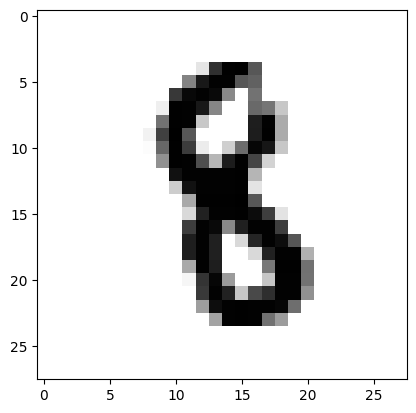

Predição:  8


In [18]:
random_value = randint(0, len(predict))

plt.imshow(x_test[random_value],cmap=plt.cm.binary)
plt.show()


print('Predição: ', np.argmax(predict[random_value]))